# NN Models
## Adaline

### Imports

In [1]:
from __future__ import print_function
import sys
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
import numpy as np
%matplotlib inline

### Predict function
Threshold is theta <br>
Total_activation is y(in)

In [27]:
def predict(inputs, weights):
    threshold = 0.0
    total_activation=0.0
    for input, weight in zip(inputs, weights):
        total_activation += input*weight
    return 1.0 if total_activation >= threshold else 0.0

### Accuracy function

In [29]:
def accuracy(matrix, weights):
    num_correct = 0.0
    preds = []
    for i in range(len(matrix)):
        # get prediction classification
        pred = predict(matrix[i][:-1], weights)
        preds.append(pred)
        # check if prediction is accurate
        if pred==matrix[i][-1]: num_correct+=1.0
    
    print("Predictions: ", preds)
    
    # return overall prediction accuracy
    return num_correct/float(len(matrix))

In [30]:
def train_weights(matrix, weights, nb_epochs=10, l_rate= 1.0,
                 do_plot=False, stop_early=True, verbose=True):
    # iterate for the number of epochs
    for epoch in range(nb_epochs):
        # calculate the current accracy
        cur_acc = accuracy(matrix, weights)
        
        print("\nEpoch %d \nWeights: "%epoch, weights)
        print("Accuracy: ",cur_acc)
        
        # check if we are finished training
        if cur_acc==1.0 and stop_early: break
            
        # check if we should plot the current results
        if do_plot: plot(matrix, weights, title="Epoch %d"%epoch)
            
        # iterate over each training input
        for i in range(len(matrix)):
            # calculate prediction
            prediction = predict(matrix[i][:-1], weights) 
            
            # calculate error
            error = matrix[i][-1] - prediction
            
            if verbose: print("Training on data at index %d..."%i)
            
            # iterate over each weight and update it
            for j in range(len(weights)):
                if verbose: sys.stdout.write("\tWeight[%d]: %0.5f --> "%(j, weights[j]))    
                weights[j] = weights[j] + (l_rate * error * matrix[i][j])
                if verbose: sys.stdout.write("%0.5f\n"%weights[j])
    
    # plot out final results
    plot(matrix, weights, title="Final Epoch")
    return weights

### Data
Bias x1 x2 y

In [31]:
data = [
    [1, 0.08, 0.72, 1],
    [1, 0.10, 1.00, 0],
    [1, 0.26, 0.58, 1],
    [1, 0.35, 0.95, 0],
    [1, 0.45, 0.15, 1],
    [1, 0.60, 0.30, 1],
    [1, 0.70, 0.65, 0],
    [1, 0.92, 0.45, 0]]

weights = [0.2, 1, -1]

In [32]:
data2 = [
    [1, -1, -1, -1],
    [1, -1, 1, -1],
    [1, 1, -1, -1],
    [1, 1, 1, 1]]

weights2 = [0.1, 0.1, 0.1]

In [33]:
def plot(matrix,weights=None,title="Prediction Matrix"):

    if len(matrix[0])==3: # if 1D inputs, excluding bias and ys 
        fig,ax = plt.subplots()
        ax.set_title(title)
        ax.set_xlabel("i1")
        ax.set_ylabel("Classifications")

        if weights!=None:
            y_min=-0.1
            y_max=1.1
            x_min=0.0
            x_max=1.1
            y_res=0.001
            x_res=0.001
            ys=np.arange(y_min,y_max,y_res)
            xs=np.arange(x_min,x_max,x_res)
            zs=[]
            for cur_y in np.arange(y_min,y_max,y_res):
                for cur_x in np.arange(x_min,x_max,x_res):
                    zs.append(predict([1.0,cur_x],weights))
            xs,ys=np.meshgrid(xs,ys)
            zs=np.array(zs)
            zs = zs.reshape(xs.shape)
            cp=plt.contourf(xs,ys,zs,levels=[-1,-0.0001,0,1],colors=('b','r'),alpha=0.1)
        
        c1_data=[[],[]]
        c0_data=[[],[]]

        for i in range(len(matrix)):
            cur_i1 = matrix[i][1]
            cur_y  = matrix[i][-1]

            if cur_y==1:
                c1_data[0].append(cur_i1)
                c1_data[1].append(1.0)
            else:
                c0_data[0].append(cur_i1)
                c0_data[1].append(0.0)

        plt.xticks(np.arange(x_min,x_max,0.1))
        plt.yticks(np.arange(y_min,y_max,0.1))
        plt.xlim(0,1.05)
        plt.ylim(-0.05,1.05)

        c0s = plt.scatter(c0_data[0],c0_data[1],s=40.0,c='r',label='Class -1')
        c1s = plt.scatter(c1_data[0],c1_data[1],s=40.0,c='b',label='Class 1')

        plt.legend(fontsize=10,loc=1)
        plt.show()
        return

    if len(matrix[0])==4: # if 2D inputs, excluding bias and ys
        fig,ax = plt.subplots()
        ax.set_title(title)
        ax.set_xlabel("i1")
        ax.set_ylabel("i2")

        if weights!=None:
            map_min=0.0
            map_max=1.1
            y_res=0.001
            x_res=0.001
            ys=np.arange(map_min,map_max,y_res)
            xs=np.arange(map_min,map_max,x_res)
            zs=[]
            for cur_y in np.arange(map_min,map_max,y_res):
                for cur_x in np.arange(map_min,map_max,x_res):
                    zs.append(predict([1.0,cur_x,cur_y],weights))
            xs,ys=np.meshgrid(xs,ys)
            zs=np.array(zs)
            zs = zs.reshape(xs.shape)
            cp=plt.contourf(xs,ys,zs,levels=[-1,-0.0001,0,1],colors=('b','r'),alpha=0.1)

        c1_data=[[],[]]
        c0_data=[[],[]]
        for i in range(len(matrix)):
            cur_i1 = matrix[i][1]
            cur_i2 = matrix[i][2]
            cur_y  = matrix[i][-1]
            if cur_y==1:
                c1_data[0].append(cur_i1)
                c1_data[1].append(cur_i2)
            else:
                c0_data[0].append(cur_i1)
                c0_data[1].append(cur_i2)

        plt.xticks(np.arange(0.0,1.1,0.1))
        plt.yticks(np.arange(0.0,1.1,0.1))
        plt.xlim(0,1.05)
        plt.ylim(0,1.05)

        c0s = plt.scatter(c0_data[0],c0_data[1],s=40.0,c='r',label='Class -1')
        c1s = plt.scatter(c1_data[0],c1_data[1],s=40.0,c='b',label='Class 1')

        plt.legend(fontsize=10,loc=1)
        plt.show()
        return
    
    print("Matrix dimensions not covered.")

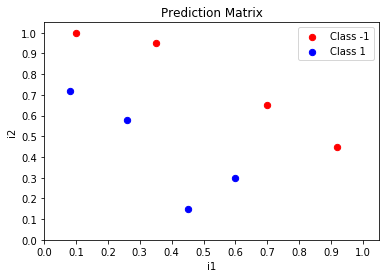

In [34]:
plot(data)

Plotting Binary Input

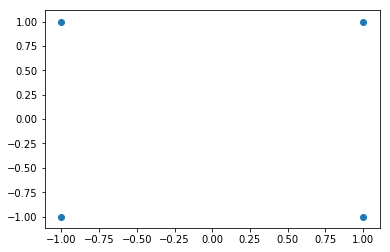

In [35]:
xCord = []
yCord = []
for i in range(len(data2)):
    xCord.append(data2[i][1])
    yCord.append(data2[i][2])
plt.scatter(xCord, yCord)
plt.show()

Predictions:  [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [0.2, 1, -1]
Accuracy:  0.5


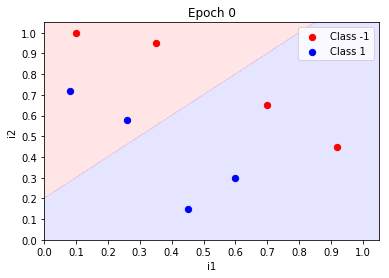

Predictions:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Epoch 1 
Weights:  [-0.8, -0.029999999999999805, -2.1]
Accuracy:  0.5


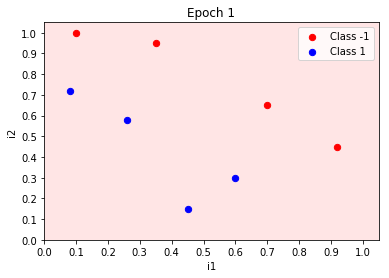

Predictions:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Epoch 2 
Weights:  [0.19999999999999996, -0.2899999999999997, -2.25]
Accuracy:  0.5


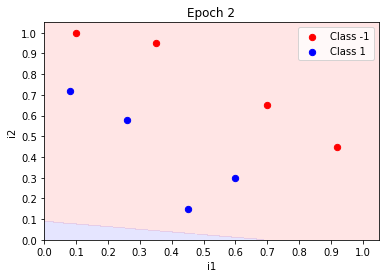

Predictions:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Epoch 3 
Weights:  [0.19999999999999996, -0.9099999999999997, -2.18]
Accuracy:  0.5


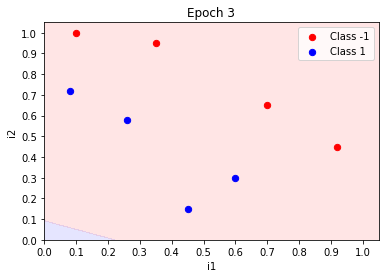

Predictions:  [1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]

Epoch 4 
Weights:  [1.2, -0.8299999999999997, -1.4600000000000002]
Accuracy:  1.0


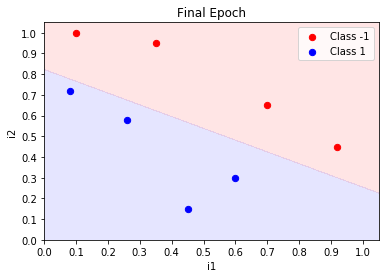

[1.2, -0.8299999999999997, -1.4600000000000002]

In [40]:
train_weights(data, weights=weights, nb_epochs=10, 
              l_rate=1, do_plot=True, stop_early=True, verbose=False)

Predictions:  [0.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [0.1, 0.1, 0.1]
Accuracy:  0.25
Training on data at index 0...
	Weight[0]: 0.10000 --> -0.40000
	Weight[1]: 0.10000 --> 0.60000
	Weight[2]: 0.10000 --> 0.60000
Training on data at index 1...
	Weight[0]: -0.40000 --> -0.90000
	Weight[1]: 0.60000 --> 1.10000
	Weight[2]: 0.60000 --> 0.10000
Training on data at index 2...
	Weight[0]: -0.90000 --> -1.90000
	Weight[1]: 1.10000 --> 0.10000
	Weight[2]: 0.10000 --> 1.10000
Training on data at index 3...
	Weight[0]: -1.90000 --> -1.40000
	Weight[1]: 0.10000 --> 0.60000
	Weight[2]: 1.10000 --> 1.60000
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 1 
Weights:  [-1.4, 0.6000000000000001, 1.6]
Accuracy:  0.25
Training on data at index 0...
	Weight[0]: -1.40000 --> -1.90000
	Weight[1]: 0.60000 --> 1.10000
	Weight[2]: 1.60000 --> 2.10000
Training on data at index 1...
	Weight[0]: -1.90000 --> -2.40000
	Weight[1]: 1.10000 --> 1.60000
	Weight[2]: 2.10000 --> 1.60000
Training on data at index 2...
	Weigh

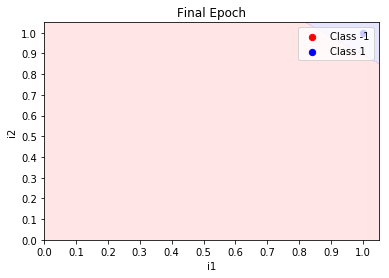

[-13.4, 6.6, 7.6]

In [37]:
train_weights(data2, weights2, nb_epochs=10, l_rate=0.5, do_plot=False, stop_early=True, verbose=True)

In [38]:
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

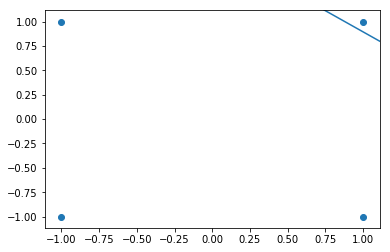

In [39]:
plt.scatter(xCord, yCord)
p1 = [0, (-1*weights2[0])/weights2[2]]
p2 = [(-1*weights2[0])/weights2[1], 0]
newline(p1, p2)
plt.show()

### Using Perceptron

In [41]:
def train_weights_perceptron(matrix, weights, nb_epochs=10, l_rate= 1.0):
    for epoch in range(nb_epochs):
        cur_acc = accuracy(matrix, weights)
        
        print("\nEpoch %d \nWeights: "%epoch, weights)
        print("Accuracy: ",cur_acc)
    
        if cur_acc==1.0: break
            
        for i in range(len(matrix)):
            prediction = predict(matrix[i][:-1], weights) 
            
            error = matrix[i][-1]
            
            for j in range(len(weights)):
                weights[j] = weights[j] + (l_rate * error * matrix[i][j])
    
    print("Final weights", weights)
    return weights

In [43]:
weights2 = [0, 0, 0]
train_weights_perceptron(data2, weights2, 10, 1)

Predictions:  [1.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [0, 0, 0]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 1 
Weights:  [-2, 2, 2]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 2 
Weights:  [-4, 4, 4]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 3 
Weights:  [-6, 6, 6]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 4 
Weights:  [-8, 8, 8]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 5 
Weights:  [-10, 10, 10]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 6 
Weights:  [-12, 12, 12]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 7 
Weights:  [-14, 14, 14]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 8 
Weights:  [-16, 16, 16]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 9 
Weights:  [-18, 18, 18]
Accuracy:  0.25
Final weights [-20, 20, 20]


[-20, 20, 20]

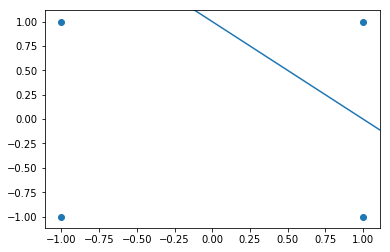

In [44]:
plt.scatter(xCord, yCord)
p1 = [0, (-1*weights2[0])/weights2[2]]
p2 = [(-1*weights2[0])/weights2[1], 0]
newline(p1, p2)
plt.show()

### Using Hebbs

In [45]:
def train_weights_hebbs(matrix, weights, nb_epochs=10):
    for epoch in range(nb_epochs):
        cur_acc = accuracy(matrix, weights)
        
        print("\nEpoch %d \nWeights: "%epoch, weights)
        print("Accuracy: ",cur_acc)
    
        if cur_acc==1.0: break
            
        for i in range(len(matrix)):
            prediction = predict(matrix[i][:-1], weights) 
            
            for j in range(len(weights)):
                weights[j] = weights[j] + (matrix[i][-1] * matrix[i][j])
    
    print("Final weights", weights)
    return weights

In [47]:
weights2 = [0, 0, 0]
train_weights_hebbs(data2, weights2, 10)

Predictions:  [1.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [0, 0, 0]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 1 
Weights:  [-2, 2, 2]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 2 
Weights:  [-4, 4, 4]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 3 
Weights:  [-6, 6, 6]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 4 
Weights:  [-8, 8, 8]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 5 
Weights:  [-10, 10, 10]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 6 
Weights:  [-12, 12, 12]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 7 
Weights:  [-14, 14, 14]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 8 
Weights:  [-16, 16, 16]
Accuracy:  0.25
Predictions:  [0.0, 0.0, 0.0, 1.0]

Epoch 9 
Weights:  [-18, 18, 18]
Accuracy:  0.25
Final weights [-20, 20, 20]


[-20, 20, 20]

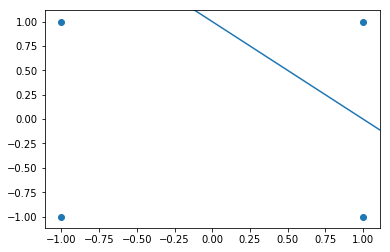

In [48]:
plt.scatter(xCord, yCord)
p1 = [0, (-1*weights2[0])/weights2[2]]
p2 = [(-1*weights2[0])/weights2[1], 0]
newline(p1, p2)
plt.show()